In [1]:
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv("1-newstudents.csv")
df

,Year,Undergraduate,Graduate,Non-Degree
0,2007/08,"68,195","78,489","26,437"
1,2008/09,"82,136","84,828","33,496"
2,2009/10,"79,365","84,613","38,992"
3,2010/11,"84,543","89,505","40,442"
4,2011/12,"90,903","92,211","45,353"
5,2012/13,"102,069","100,129","48,722"
6,2013/14,"109,486","108,519","52,123"
7,2014/15,"112,765","121,637","59,364"
8,2015/16,"119,262","126,516","54,965"
9,2016/17,"115,841","124,888","50,107"


In [3]:
df.info()
#都是object,说明数字的格式并不是int,无法被作为数字处理，所以直接作图会出现错误

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
Year             11 non-null object
Undergraduate    11 non-null object
Graduate         11 non-null object
Non-Degree       11 non-null object
dtypes: object(4)
memory usage: 432.0+ bytes


In [4]:
df.Undergraduate.replace(",", " ")
#不知道为什么没有用？？？可能是因为object?
#object是什么？不能被处理吗？？？？？？？？？？？？？？？

0      68,195
1      82,136
2      79,365
3      84,543
4      90,903
5     102,069
6     109,486
7     112,765
8     119,262
9     115,841
10    108,539
Name: Undergraduate, dtype: object

In [5]:
df["Undergraduate"] = df["Undergraduate"].str.replace(",", "").astype(int)

In [6]:
df
#证明有效，所以继续这样处理每一列

,Year,Undergraduate,Graduate,Non-Degree
0,2007/08,68195,"78,489","26,437"
1,2008/09,82136,"84,828","33,496"
2,2009/10,79365,"84,613","38,992"
3,2010/11,84543,"89,505","40,442"
4,2011/12,90903,"92,211","45,353"
5,2012/13,102069,"100,129","48,722"
6,2013/14,109486,"108,519","52,123"
7,2014/15,112765,"121,637","59,364"
8,2015/16,119262,"126,516","54,965"
9,2016/17,115841,"124,888","50,107"


In [7]:
df["Graduate"] = df["Graduate"].str.replace(",", "").astype(int)
df["Non-Degree"] = df["Non-Degree"].str.replace(",", "").astype(int)

In [8]:
df
#至此df正常，可以作图

,Year,Undergraduate,Graduate,Non-Degree
0,2007/08,68195,78489,26437
1,2008/09,82136,84828,33496
2,2009/10,79365,84613,38992
3,2010/11,84543,89505,40442
4,2011/12,90903,92211,45353
5,2012/13,102069,100129,48722
6,2013/14,109486,108519,52123
7,2014/15,112765,121637,59364
8,2015/16,119262,126516,54965
9,2016/17,115841,124888,50107


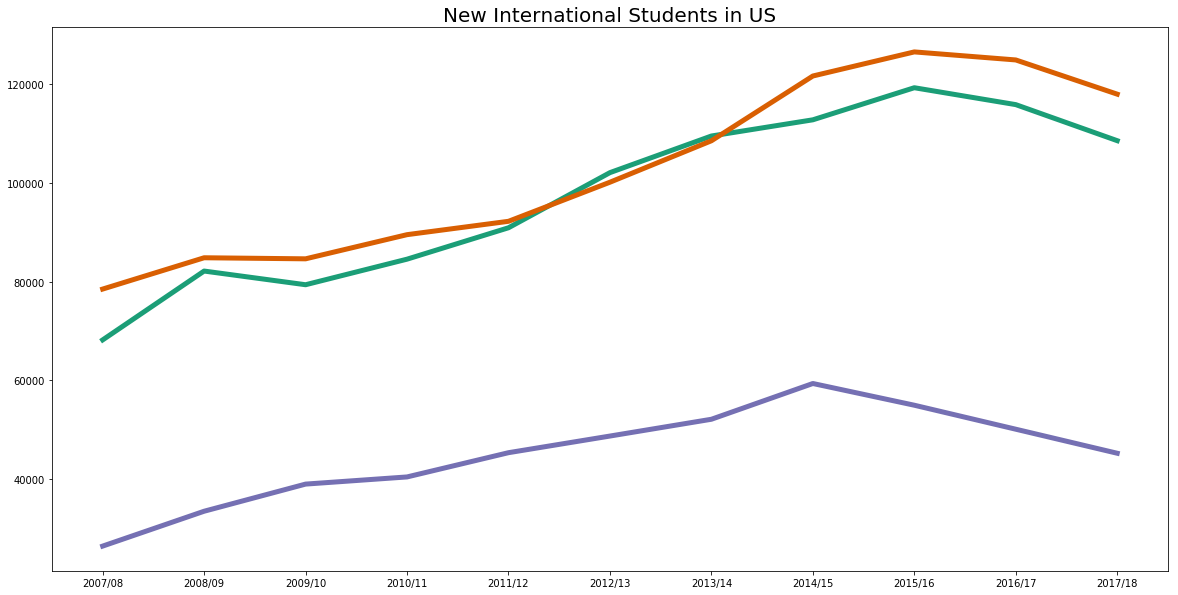

In [9]:
#fig表示整个类，ax是一个子集，figsize不仅是比例，而且和大小有关
#可以在Color brew里找颜色的代码
#第一行是重新初始化
fig, ax = plt.subplots(figsize=(20, 10))

plt.title('New International Students in US')
ax.title.set_fontsize(20)
#是否可以调整字体大小？还是放在AI里做比较好？

ax.plot(df["Year"],
        df["Undergraduate"],
        color = "#1b9e77",
        linewidth=5.0)

ax.plot(df["Year"],
        df["Graduate"],
        color = "#d95f02",
        linewidth=5.0)

ax.plot(df["Year"],
        df["Non-Degree"],
        color = "#7570b3",
        linewidth=5.0)

plt.savefig("NewIntlStudents.pdf", transparent=True)

In [10]:
#图2 origine  条状图  

origine = pd.read_csv('2-origine.csv')
origine

,Rank,Places of origin,2017/18,% of Total,Change
0,1,China,"363,341",33.2,3.6
1,2,India,"196,271",17.9,5.4
2,3,South Korea,"54,555",5.0,-7.0
3,4,Saudi Arabia,"44,432",4.1,-15.5
4,5,Canada,"25,909",2.4,-4.3
5,6,Vietnam,"24,325",2.2,8.4
6,7,Taiwan,"22,454",2.1,4.4
7,8,Japan,"18,753",1.7,-0.1
8,9,Mexico,"15,468",1.4,-8.1
9,10,Brazil,"14,620",1.3,11.7


In [11]:
origine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
Rank                10 non-null int64
Places of origin    10 non-null object
2017/18             10 non-null object
% of Total          10 non-null float64
Change              10 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 480.0+ bytes


In [12]:
origine["2017/18"] = origine["2017/18"].str.replace(",", "").astype(int)

In [13]:
origine

,Rank,Places of origin,2017/18,% of Total,Change
0,1,China,363341,33.2,3.6
1,2,India,196271,17.9,5.4
2,3,South Korea,54555,5.0,-7.0
3,4,Saudi Arabia,44432,4.1,-15.5
4,5,Canada,25909,2.4,-4.3
5,6,Vietnam,24325,2.2,8.4
6,7,Taiwan,22454,2.1,4.4
7,8,Japan,18753,1.7,-0.1
8,9,Mexico,15468,1.4,-8.1
9,10,Brazil,14620,1.3,11.7


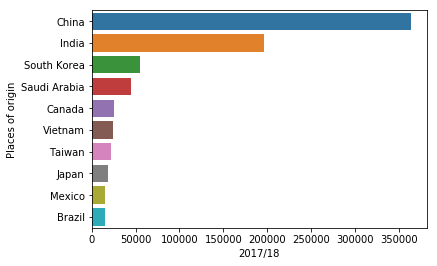

In [14]:
sns.barplot(data=origine, 
            x='2017/18', 
            y='Places of origin')

plt.savefig("Places of origin.pdf", transparent=True,bbox_inches = 'tight')
#转换成PDF以后左边国家名字不完整

In [15]:
#另外一种方法，有什么区别
#fig, ax = plt.subplots()
#origine.iloc[::-1].plot(ax=ax, x='Origine', y='2017/18', kind='barh', color="#E5F013", width=0.6, figsize=(5, 6))

In [16]:
#图3 中国学生数量的年度变化

chinesechange = pd.read_csv('3-Chinese Students.csv')
chinesechange

,Year,Chinese_students,y-o-y_change%
0,2017/18,"363,341",3.6
1,2016/17,"350,755",6.8
2,2015/16,"328,547",8.1
3,2014/15,"304,040",10.8
4,2013/14,"274,439",16.5
5,2012/13,"235,597",21.4
6,2011/12,"194,029",23.1
7,2010/11,"157,558",23.5
8,2009/10,"127,628",29.9
9,2008/09,"98,235",21.1


In [17]:
chinesechange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
Year                11 non-null object
Chinese_students    11 non-null object
y-o-y_change%       11 non-null float64
dtypes: float64(1), object(2)
memory usage: 344.0+ bytes


In [18]:
chinesechange["Chinese_students"] = chinesechange["Chinese_students"].str.replace(",", "").astype(int)

In [19]:
chinesechange

,Year,Chinese_students,y-o-y_change%
0,2017/18,363341,3.6
1,2016/17,350755,6.8
2,2015/16,328547,8.1
3,2014/15,304040,10.8
4,2013/14,274439,16.5
5,2012/13,235597,21.4
6,2011/12,194029,23.1
7,2010/11,157558,23.5
8,2009/10,127628,29.9
9,2008/09,98235,21.1


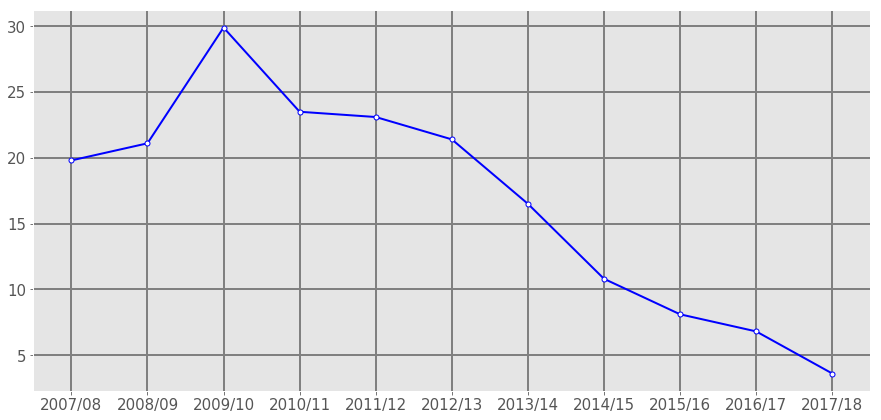

In [49]:
#year 这一栏是obj，无法作为数字被识别，所以只能手动排序，所以用 iloc[::-1] 来做倒序

fig, ax=plt.subplots(figsize=(15,7))
ax.tick_params(axis='both', which='major', labelsize=15)  #设置坐标轴上单位字的大小

plt.plot(chinesechange.Year.iloc[::-1], # x轴数据
         chinesechange["y-o-y_change%"].iloc[::-1], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'blue', # 折线颜色
         fillstyle ="full",
         markerfacecolor='#FFFFFF',
         marker="o",
         markersize=5
        )

plt.grid(True)
plt.grid(color='grey', linestyle='-', linewidth=2)


plt.savefig("ChineseGrowth.pdf", transparent=True)
#网格线和底灰色时有时无，不知道为什么
#Transparent的效果只有在AI里才能看出效果

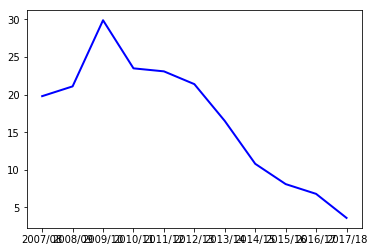

In [21]:
#另一个方法
plt.plot(chinesechange.Year.iloc[::-1], # x轴数据
         chinesechange["y-o-y_change%"].iloc[::-1], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'blue'# 折线颜色
        )

#怎么修改y轴？

In [22]:
#图4  中国学生的专业偏好  做pie chart 
#饼图的不同板块需要按照大小来排，饼上有数据

fields = pd.read_csv('4-fields.csv')
fields = fields.sort_values(by="Percent").reset_index(drop=True)
fields

,Fields,Percent
0,Humanities,1.1
1,Health Professions,1.4
2,Education,1.8
3,Intensive English,2.1
4,Undeclared,2.3
5,Fine/ Applied Arts,6.6
6,Physical/ Life Sciences,8.4
7,Social Sciences,8.4
8,Other Fields of Study,11.0
9,Math/ Computer Science,17.2


In [23]:
fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
Fields     12 non-null object
Percent    12 non-null float64
dtypes: float64(1), object(1)
memory usage: 272.0+ bytes


In [24]:
fields['Fields']

0                  Humanities
1          Health Professions
2                   Education
3           Intensive English
4                  Undeclared
5          Fine/ Applied Arts
6     Physical/ Life Sciences
7             Social Sciences
8       Other Fields of Study
9      Math/ Computer Science
10                Engineering
11            Business/ Mgmt.
Name: Fields, dtype: object

In [25]:
fields['Percent']

0      1.1
1      1.4
2      1.8
3      2.1
4      2.3
5      6.6
6      8.4
7      8.4
8     11.0
9     17.2
10    19.0
11    20.7
Name: Percent, dtype: float64

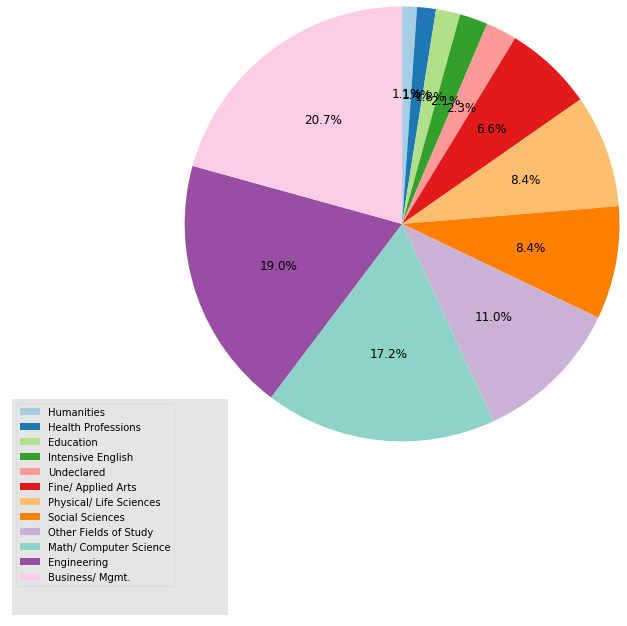

In [26]:
#做饼图
plt.style.use('ggplot')
plt.axes(aspect='equal') #不懂这一步

colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#8dd3c7','#984ea3','#fccde5']


plt.pie(x = fields.Percent, # 绘图数据
        autopct='%.1f%%', # 设置百分比的格式，这里保留一位小数（这句的内容不懂）
        colors=colors,
        startangle = 90, # 设置饼图的初始角度，可能饼图从哪里开始是看这一句？
        radius = 1, # 设置饼图的半径，数字代表什么？
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor': None},# 设置饼图内外边界的属性值
        textprops = {'fontsize':12, 'color':'k'}, # 设置文本标签的属性值
        center = (1.8,1.8), # 设置饼图的原点 （不明白这一句）
        frame = 1 )# 是否显示饼图的图框，这里设置显示  

#这两行是设置图例
labels = list(fields.Fields)
plt.legend(labels, loc=2)#不知道loc=2是什么意思？？？？？

plt.xticks(())
plt.yticks(())

plt.savefig("fields.pdf", transparent=True,bbox_inches = 'tight')